In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
import geopandas as gpd
from shapely.geometry import Point, LineString
from geopandas import GeoDataFrame

import folium
from folium import Marker, GeoJson
from folium.plugins import MarkerCluster, HeatMap

import pycountry 

ImportError: cannot import name 'soft_unicode' from 'markupsafe' (e:\Anaconda\lib\site-packages\markupsafe\__init__.py)

In [ ]:
df = pd.read_csv('covid_worldwide.csv')

In [ ]:
df.head(10)

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,1,USA,"104,196,861","1,132,935","101,322,779","1,741,147","1,159,832,679","334,805,269"
1,2,India,"44,682,784","530,740","44,150,289","1,755","915,265,788","1,406,631,776"
2,3,France,"39,524,311","164,233","39,264,546","95,532","271,490,188","65,584,518"
3,4,Germany,"37,779,833","165,711","37,398,100","216,022","122,332,384","83,883,596"
4,5,Brazil,"36,824,580","697,074","35,919,372","208,134","63,776,166","215,353,593"
5,6,Japan,"32,588,442","68,399","21,567,425","10,952,618","92,144,639","125,584,838"
6,7,S. Korea,"30,197,066","33,486","29,740,877","422,703","15,804,065","51,329,899"
7,8,Italy,"25,453,789","186,833","25,014,986","251,970","265,478,247","60,262,770"
8,9,UK,"24,274,361","204,171","24,020,088","50,102","522,526,476","68,497,907"
9,10,Russia,"21,958,696","395,108","21,356,008","207,580","273,400,000","145,805,947"


In [ ]:
# Checking Column name
df.columns

Index(['Serial Number', 'Country', 'Total Cases', 'Total Deaths',
       'Total Recovered', 'Active Cases', 'Total Test', 'Population'],
      dtype='object')

In [ ]:
#Checking Column Types
df.dtypes

serial_number       int64
country            object
total_cases        object
total_deaths       object
total_recovered    object
active_cases       object
total_test         object
population         object
dtype: object

In [ ]:
# Renaming column names for ease of use 
df = df.rename(columns = {'Serial Number' : 'serial_number', 'Country':'country', 'Total Cases':'total_cases', 'Total Deaths':'total_deaths', 'Total Recovered':'total_recovered', 'Active Cases':'active_cases', 'Total Test':'total_test', 'Population':'population'})
df


,serial_number,country,total_cases,total_deaths,total_recovered,active_cases,total_test,population
0,1,USA,"104,196,861","1,132,935","101,322,779","1,741,147","1,159,832,679","334,805,269"
1,2,India,"44,682,784","530,740","44,150,289","1,755","915,265,788","1,406,631,776"
2,3,France,"39,524,311","164,233","39,264,546","95,532","271,490,188","65,584,518"
3,4,Germany,"37,779,833","165,711","37,398,100","216,022","122,332,384","83,883,596"
4,5,Brazil,"36,824,580","697,074","35,919,372","208,134","63,776,166","215,353,593"
...,...,...,...,...,...,...,...,...
226,227,Diamond Princess,712,13,699,0,NaN,NaN
227,228,Vatican City,29,NaN,29,0,NaN,799
228,229,Western Sahara,10,1,9,0,NaN,"626,161"
229,230,MS Zaandam,9,2,7,0,NaN,NaN


In [ ]:
#Renaming USA to United States
df['country'] = df['country'].str.replace('USA', 'United States of America')

df.head()

,serial_number,country,total_cases,total_deaths,total_recovered,active_cases,total_test,population
0,1,United States of America,"104,196,861","1,132,935","101,322,779","1,741,147","1,159,832,679","334,805,269"
1,2,India,"44,682,784","530,740","44,150,289","1,755","915,265,788","1,406,631,776"
2,3,France,"39,524,311","164,233","39,264,546","95,532","271,490,188","65,584,518"
3,4,Germany,"37,779,833","165,711","37,398,100","216,022","122,332,384","83,883,596"
4,5,Brazil,"36,824,580","697,074","35,919,372","208,134","63,776,166","215,353,593"


In [ ]:
#Eliminating ',' in the numbers and changing the columns that contain numbers into float

column_change = ['total_cases', 'total_deaths', 'total_recovered', 'active_cases', 'total_test', 'population']

df['total_cases'] = df['total_cases'].str.replace(',', '').astype('float64')
df['total_deaths'] = df['total_deaths'].str.replace(',', '').astype('float64')
df['total_recovered'] = df['total_recovered'].str.replace(',', '').astype('float64')
df['active_cases'] = df['active_cases'].str.replace(',', '').astype('float64')
df['total_test'] = df['total_test'].str.replace(',', '').astype('float64')
df['population'] = df['population'].str.replace(',', '').astype('float64')


In [ ]:
#Checking if changes has been made
df.dtypes

serial_number        int64
country             object
total_cases        float64
total_deaths       float64
total_recovered    float64
active_cases       float64
total_test         float64
population         float64
dtype: object

serial_number       0
country             0
total_cases         0
total_deaths        6
total_recovered    21
active_cases       19
total_test         18
population          3
dtype: int64


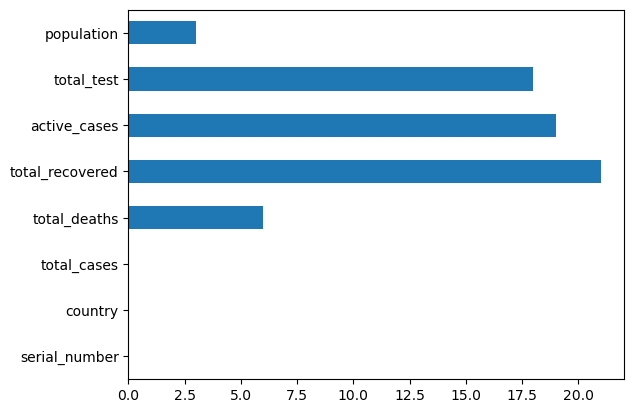

In [ ]:
#Checking for Missing Values

print(df.isna().sum())

df.isna().sum().plot.barh()

plt.show()

In [ ]:
# Checking total_recovered missing values

df[df['total_recovered'].isna()]

,serial_number,country,total_cases,total_deaths,total_recovered,active_cases,total_test,population
10,11,Turkey,17042722.0,101492.0,NaN,NaN,162743369.0,85561976.0
65,66,Tunisia,1150356.0,29308.0,NaN,NaN,4997373.0,12046656.0
77,78,Paraguay,806256.0,19820.0,NaN,NaN,2657506.0,7305843.0
94,95,Honduras,470757.0,11104.0,NaN,NaN,1619676.0,10221247.0
111,112,Martinique,229687.0,1097.0,NaN,NaN,828928.0,374087.0
112,113,Laos,217973.0,758.0,NaN,NaN,1233207.0,7481023.0
113,114,Iceland,208688.0,229.0,NaN,NaN,1996384.0,345393.0
117,118,Guadeloupe,201394.0,1007.0,NaN,NaN,938039.0,399794.0
136,137,Suriname,82020.0,1398.0,NaN,NaN,239603.0,596831.0
138,139,French Polynesia,77957.0,649.0,NaN,NaN,NaN,284164.0


In [ ]:
#Dropping Rows with Null Values in total_recovered columns

df.dropna(subset=['total_recovered'], inplace=True)

In [ ]:
#Checking null values in population column

df[df['population'].isna()]

,serial_number,country,total_cases,total_deaths,total_recovered,active_cases,total_test,population
90,91,China,503302.0,5272.0,379053.0,118977.0,160000000.0,NaN
226,227,Diamond Princess,712.0,13.0,699.0,0.0,NaN,NaN
229,230,MS Zaandam,9.0,2.0,7.0,0.0,NaN,NaN


In [ ]:
#Filling China Population

df.loc[90, 'population'] = 1439323776

df.loc[90]

serial_number                91
country                   China
total_cases            503302.0
total_deaths             5272.0
total_recovered        379053.0
active_cases           118977.0
total_test          160000000.0
population         1439323776.0
Name: 90, dtype: object

In [ ]:
#Droping the rows of the cruise ship 
df.drop([226], inplace=True)
df.drop([229], inplace=True)

In [ ]:
# Filling the Missing Values of total_deaths to 0

df['total_deaths'].fillna(0, inplace=True)
df[df['total_test'].isna()]

,serial_number,country,total_cases,total_deaths,total_recovered,active_cases,total_test,population
29,30,DPRK,4772813.0,74.0,4772739.0,0.0,NaN,25990679.0
150,151,Seychelles,50665.0,172.0,50440.0,53.0,NaN,99426.0
181,182,Nicaragua,18491.0,225.0,4225.0,14041.0,NaN,6779100.0
183,184,Tajikistan,17786.0,125.0,17264.0,397.0,NaN,9957464.0
190,191,Marshall Islands,15584.0,17.0,15528.0,39.0,NaN,60057.0
203,204,Comoros,8992.0,161.0,8827.0,4.0,NaN,907419.0
215,216,Kiribati,5008.0,18.0,2703.0,2287.0,NaN,123419.0
222,223,Saint Helena,2166.0,0.0,2.0,2164.0,NaN,6115.0
225,226,Niue,747.0,0.0,746.0,1.0,NaN,1622.0
227,228,Vatican City,29.0,0.0,29.0,0.0,NaN,799.0


In [ ]:
df.drop(columns='serial_number', inplace=True)
df.reset_index(inplace=True)

Text(0.5, 1.0, 'Top Countries with Total Cases')

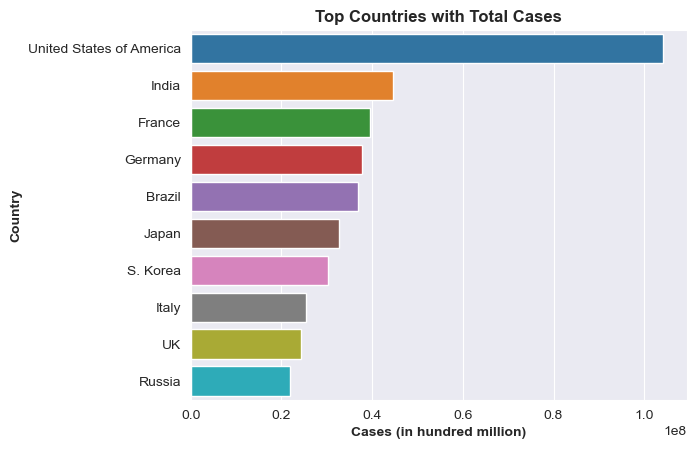

In [ ]:
# Countries with total cases

country_case = df[['country', 'total_cases']]

country_case_plot = country_case.sort_values('total_cases', ascending=False).head(10)

sns.set_style("darkgrid")

ccplot = sns.barplot(x='total_cases', y='country', data=country_case_plot)
ccplot.set_ylabel('Country', fontweight='bold')
ccplot.set_xlabel('Cases (in hundred million)', fontweight='bold')
ccplot.set_title('Top Countries with Total Cases', fontweight='heavy')

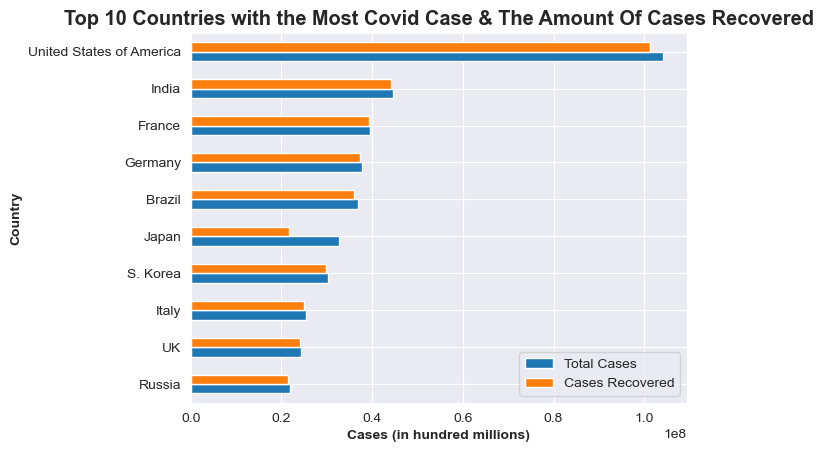

In [ ]:
# Top 10 Countries with the most Covid Cases and The amount of people who recovered

case_recov = df[['country', 'total_cases', 'total_recovered']]

case_recov_df = case_recov.head(10)

case_recov_df.sort_values('total_cases').plot(x='country', kind='barh', stacked=False)

plt.title("Top 10 Countries with the Most Covid Case & The Amount Of Cases Recovered", weight='heavy', fontsize='x-large')
plt.xlabel("Cases (in hundred millions)", weight='bold')
plt.ylabel("Country", weight='bold')

plt.legend(['Total Cases', 'Cases Recovered'])
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_3188\653137892.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  case_recov_df['recov_perc'] = (df['total_recovered'] / df['total_cases']) * 100


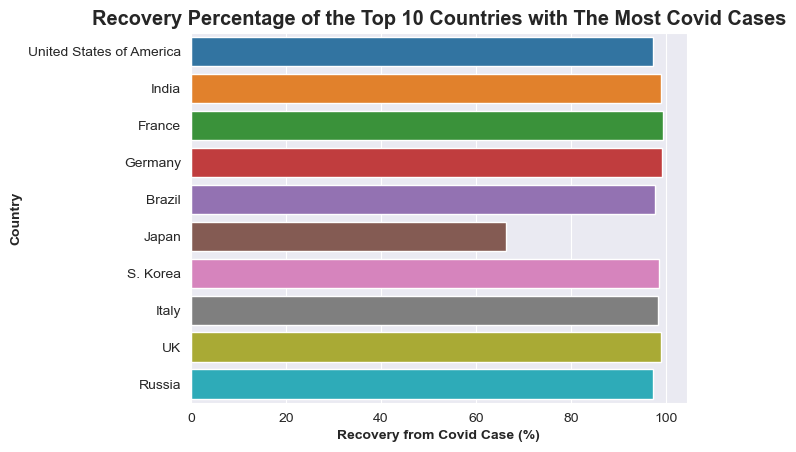

In [ ]:
#Recovery Percentage from the Country's Total Case

case_recov_df['recov_perc'] = (df['total_recovered'] / df['total_cases']) * 100

case_recov_df['recov_perc']

recov_perc_plot = sns.barplot(data=case_recov_df, x='recov_perc', y='country')

plt.title("Recovery Percentage of the Top 10 Countries with The Most Covid Cases", weight='heavy', fontsize='x-large')
plt.xlabel("Recovery from Covid Case (%)", weight='bold')
plt.ylabel("Country", weight='bold')

plt.show()

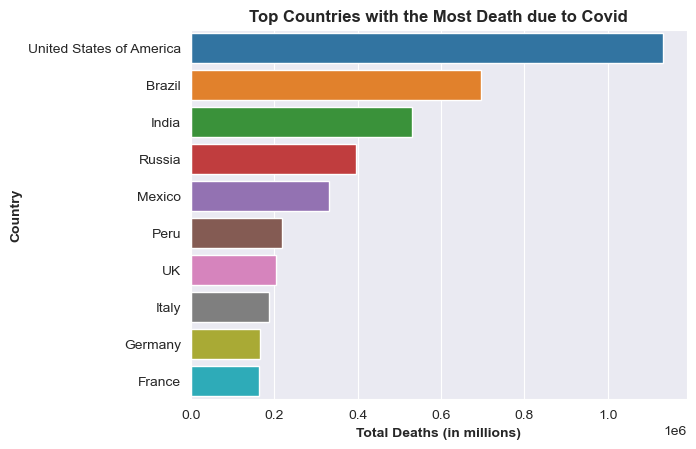

In [ ]:
#Countries with the most Deaths from Covid

deaths_df = df[['country', 'total_deaths']]

deaths_plot = deaths_df.sort_values('total_deaths',ascending=False).head(10)


dplot = sns.barplot(data=deaths_plot, x='total_deaths', y='country')

dplot.set_xlabel('Total Deaths (in millions)', fontweight='bold')
dplot.set_ylabel('Country', fontweight='bold')
dplot.set_title('Top Countries with the Most Death due to Covid', fontweight='heavy')

plt.show()

In [ ]:
a = df['cases_per_pop'] = (df['total_cases'] / df['population']) * 100
a

0      31.121631
1       3.176580
2      60.264697
3      45.038404
4      17.099589
         ...    
203    54.535179
204    28.257805
205    46.054254
206     3.629537
207     0.001597
Length: 208, dtype: float64

Text(0.5, 1.0, "Top 10 Countries With the Most Covid Cases per Country's Population")

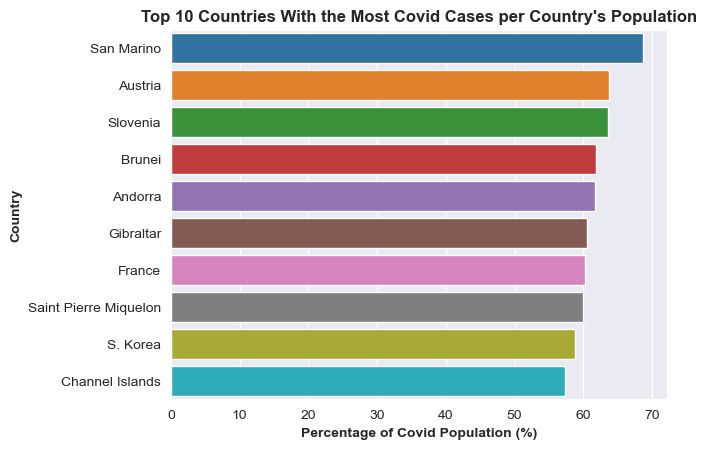

In [ ]:
#Top 10 Countries With the Most Covid Cases per Country's Population

cpp_df = df.sort_values('cases_per_pop', ascending=False).head(10)

cpp_plot = sns.barplot(data=cpp_df, x='cases_per_pop', y='country')

cpp_plot.set_xlabel('Percentage of Covid Population (%)', fontweight='bold')
cpp_plot.set_ylabel('Country', fontweight='bold')
cpp_plot.set_title("Top 10 Countries With the Most Covid Cases per Country's Population", fontweight='heavy')

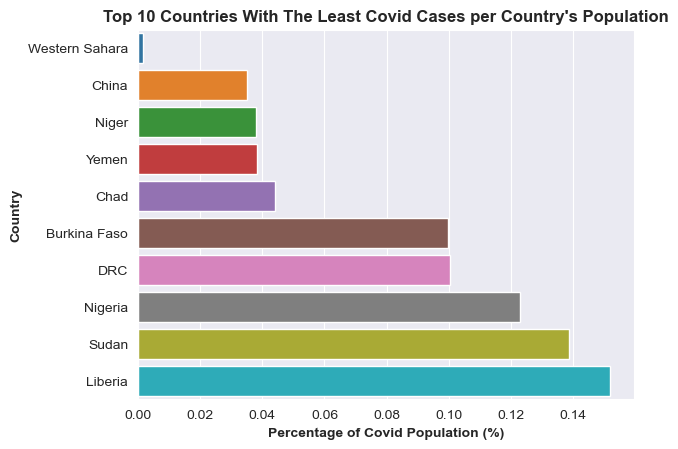

In [ ]:
#Top 10 Countries With the Least Covid Cases per Country's Population

cpp_low_df = df.sort_values('cases_per_pop').head(10)

cpp_low_plot = sns.barplot(data=cpp_low_df, x='cases_per_pop', y='country')

cpp_low_plot.set_xlabel('Percentage of Covid Population (%)', fontweight='bold')
cpp_low_plot.set_ylabel('Country', fontweight='bold')
cpp_low_plot.set_title("Top 10 Countries With The Least Covid Cases per Country's Population", fontweight='heavy')

plt.show()

In [ ]:
#Creating a new column

df['death_per_case'] = (df['total_deaths'] / df['total_cases']) * 100
df

,index,country,total_cases,total_deaths,total_recovered,active_cases,total_test,population,cases_per_pop,death_per_case
0,0,United States of America,104196861.0,1132935.0,101322779.0,1741147.0,1.159833e+09,3.348053e+08,31.121631,1.087302
1,1,India,44682784.0,530740.0,44150289.0,1755.0,9.152658e+08,1.406632e+09,3.176580,1.187795
2,2,France,39524311.0,164233.0,39264546.0,95532.0,2.714902e+08,6.558452e+07,60.264697,0.415524
3,3,Germany,37779833.0,165711.0,37398100.0,216022.0,1.223324e+08,8.388360e+07,45.038404,0.438623
4,4,Brazil,36824580.0,697074.0,35919372.0,208134.0,6.377617e+07,2.153536e+08,17.099589,1.892958
...,...,...,...,...,...,...,...,...,...,...
203,223,Falkland Islands,1930.0,0.0,1930.0,0.0,8.632000e+03,3.539000e+03,54.535179,0.000000
204,224,Montserrat,1403.0,8.0,1376.0,19.0,1.776200e+04,4.965000e+03,28.257805,0.570207
205,225,Niue,747.0,0.0,746.0,1.0,NaN,1.622000e+03,46.054254,0.000000
206,227,Vatican City,29.0,0.0,29.0,0.0,NaN,7.990000e+02,3.629537,0.000000


Text(0.5, 1.0, "Top 10 Countries With the Most Covid Death per Country's Total Cases")

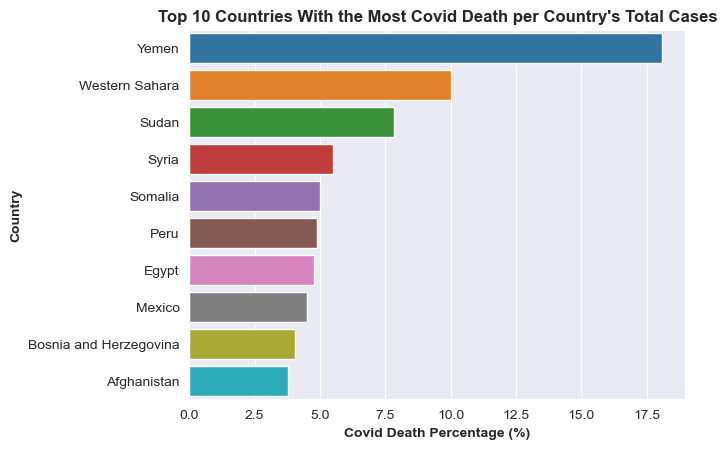

In [ ]:
# Plotting Top 10 Countries with the most Death per Total Case
dpc_df = df.sort_values('death_per_case', ascending=False).head(10)

dpc_plot = sns.barplot(data=dpc_df, x='death_per_case', y='country')

dpc_plot.set_xlabel('Covid Death Percentage (%)', fontweight='bold')
dpc_plot.set_ylabel('Country', fontweight='bold')
dpc_plot.set_title("Top 10 Countries With the Most Covid Death per Country's Total Cases", fontweight='heavy')

In [42]:
#Importing World Map File

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [44]:
#Merging covid dataset with the world dataset

dfmerge = df.merge(world, left_on='country', right_on='name')

dfmerged = GeoDataFrame(dfmerge)

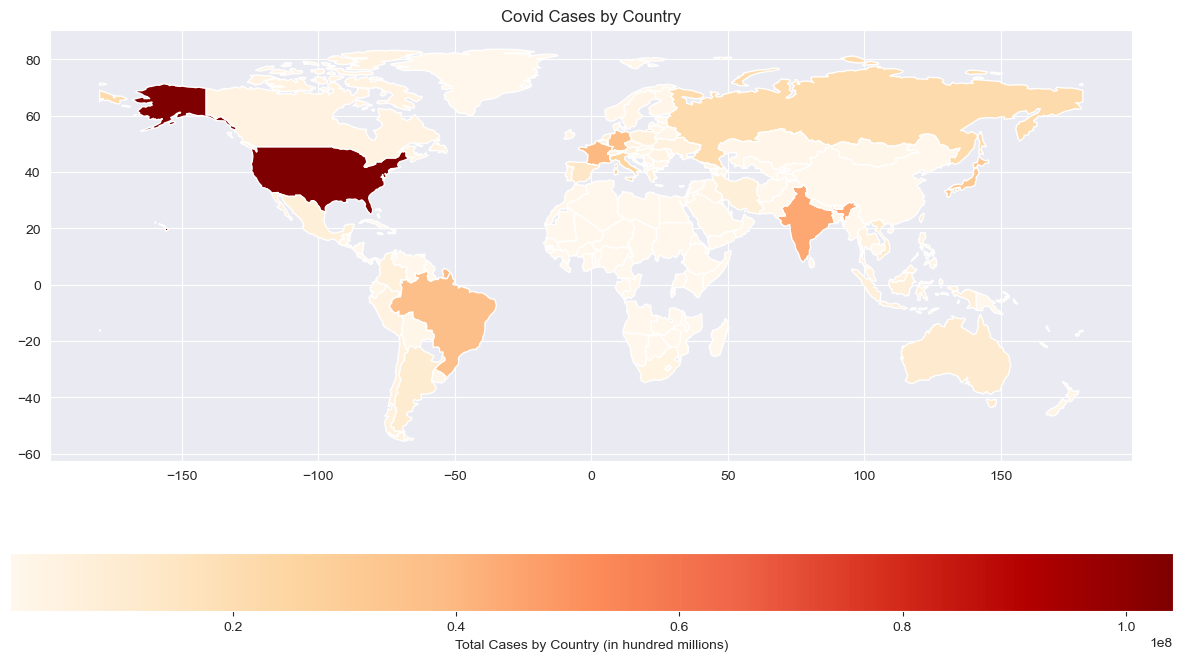

In [45]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.set_title('Covid Cases by Country')
dfmerged.plot(column='total_cases', legend=True, cmap='OrRd', ax=ax, legend_kwds={'label': "Total Cases by Country (in hundred millions)",'orientation' : 'horizontal'})
plt.show()

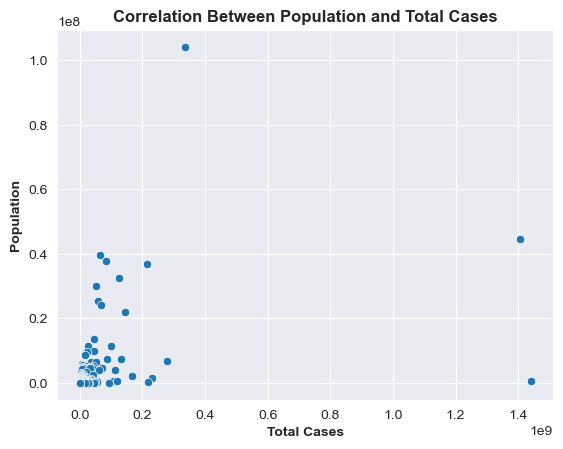

In [46]:
#Correlation Between Population and Total Cases

sc_case = sns.scatterplot(data=df, x='population', y='total_cases')
sc_case.set_xlabel('Total Cases', fontweight='bold')
sc_case.set_ylabel('Population', fontweight='bold')
sc_case.set_title("Correlation Between Population and Total Cases", fontweight='heavy')

plt.show()

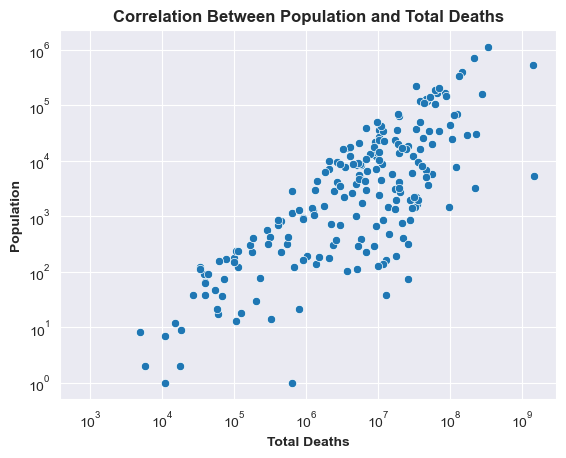

In [47]:
#Correlation Between Population and Total Deaths

sc_case = sns.scatterplot(data=df, x='population', y='total_deaths')

sc_case.set_xscale("log")
sc_case.set_yscale("log")

sc_case.set_xlabel('Total Deaths', fontweight='bold')
sc_case.set_ylabel('Population', fontweight='bold')
sc_case.set_title("Correlation Between Population and Total Deaths", fontweight='heavy')

plt.show()

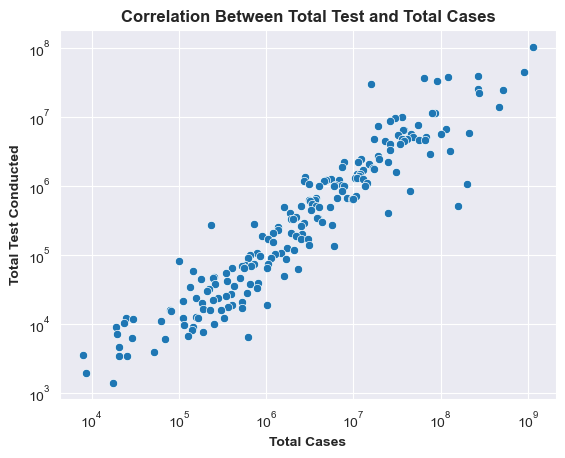

In [48]:
#Correlation Between Total Tests and Total Cases

sc_case = sns.scatterplot(data=df, x='total_test', y='total_cases')

sc_case.set_xscale("log")
sc_case.set_yscale("log")


sc_case.set_xlabel('Total Cases', fontweight='bold')
sc_case.set_ylabel('Total Test Conducted', fontweight='bold')
sc_case.set_title("Correlation Between Total Test and Total Cases", fontweight='heavy')

plt.show()

In [50]:
#Creating X and y values

X = df[['population', 'total_cases']]
y = df['total_recovered']

In [51]:
#Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=21)

In [52]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [53]:
#Predictiing the Test Set Result

y_pred = regressor.predict(X_test)
y_pred

array([ 1.57723677e+04,  7.08529097e+06,  1.33639994e+06,  2.89105646e+07,
        2.10582624e+07,  1.64135178e+01,  2.17643570e+05,  1.95104682e+04,
        3.32170774e+05,  5.29792550e+03,  5.35998280e+04,  1.49339796e+04,
        1.46101402e+03,  6.08731758e+06, -1.32199406e+04,  9.52883370e+05,
        2.07448046e+06, -2.84566315e+03,  1.40027090e+06,  3.78449569e+07,
        2.56571329e+06,  5.15857433e+05,  7.74324379e+04,  9.60905000e+06,
        5.58061660e+05,  5.52033074e+06,  3.16196073e+04,  2.35918652e+06,
        1.61460035e+05, -1.58110103e+04,  2.92989422e+04,  3.04425326e+05,
       -1.27837737e+04, -6.87251633e+03,  6.10518605e+06,  4.13451314e+03,
        2.43161193e+04,  5.45192859e+06,  3.12148977e+04,  6.54683464e+05,
        1.15847352e+05,  3.20123542e+04])

In [54]:

regressor.coef_


array([3.64980738e-04, 9.57323367e-01])

In [56]:
#Calculating the Intercept

regressor.intercept_

-16526.72282988252

In [57]:
#Calculating the R squared Value

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9985712686284333